# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [3]:
path='credit_3530203_70101.csv'
credit_df = pd.read_csv(path, index_col=0)
credit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,none,own,1.0,unskilled resident,1.0,yes,good
2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,none,car,28.0,none,own,2.0,skilled,2.0,yes,good
3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,none,life insurance,27.0,none,own,1.0,skilled,1.0,yes,bad
4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,none,no known property,42.0,none,for free,1.0,skilled,2.0,yes,good
5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,none,real estate,49.0,none,own,1.0,skilled,1.0,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,none,real estate,31.0,none,own,1.0,unskilled resident,1.0,yes,good
499,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,none,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,good
500,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,none,car,38.0,none,own,1.0,skilled,1.0,yes,good
501,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,none,no known property,23.0,none,for free,1.0,skilled,1.0,yes,bad


### 1
Шкалы признаков:
<ol>
<li>checking_status - порядковая;</li>
<li>duration - абсолютная;</li>
<li>credit_history - номинальная;</li>
<li>purpose - номинальная;</li> 
<li>credit_amount - абсолютная;</li>
<li>savings_status - порядковая;</li>
<li>employment - порядковая;</li>
<li>installment_commitment - интервальная;</li>
<li>other_parties - номинальная;</li>
<li>property_magnitude - номинальная;</li>
<li>age - абсолютная;</li>
<li>other_payment_plans - номинальная;</li>
<li>housing - номинальная;</li>
<li>existing_creditы - абсолютная;</li>
<li>job - порядковая;</li>
<li>num_dependents - абсолютная;</li>
<li>foreign_worker - номинальная;</li>
<li>class - номинальная.</li>
</ol>

In [9]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         502 non-null    object 
 1   duration                502 non-null    float64
 2   credit_history          502 non-null    object 
 3   purpose                 502 non-null    object 
 4   credit_amount           502 non-null    float64
 5   savings_status          502 non-null    object 
 6   employment              502 non-null    object 
 7   installment_commitment  502 non-null    float64
 8   other_parties           502 non-null    object 
 9   property_magnitude      502 non-null    object 
 10  age                     502 non-null    float64
 11  other_payment_plans     502 non-null    object 
 12  housing                 502 non-null    object 
 13  existing_credits        502 non-null    float64
 14  job                     502 non-null    ob

In [37]:
credit_df.describe()

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
count,502.000,502.000,502.000,502.000,502.000,502.000
mean,20.426,3296.341,2.998,35.542,1.420,1.167
std,12.748,2822.553,1.106,11.274,0.586,0.374
min,-1.000,250.000,1.000,19.000,1.000,1.000
25%,12.000,1376.250,2.000,27.000,1.000,1.000
50%,18.000,2356.000,3.000,33.000,1.000,1.000
75%,24.000,3975.250,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


# 2
Признак с наименьшей дисперсией:

In [10]:
credit_df.var().idxmin()

'num_dependents'

# 3

In [11]:
countable_cols  = set(credit_df.select_dtypes(include='float').columns)

In [12]:
credit_df.groupby('class').agg(np.mean)

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
class,,,,,,
bad,23.780,3682.220,3.067,33.317,1.354,1.152
good,18.799,3109.109,2.964,36.621,1.453,1.175


In [13]:
good_mean = credit_df[(credit_df['class'] == 'good')].loc[:, countable_cols].mean()
bad_mean = credit_df[(credit_df['class'] == 'bad')].loc[:, countable_cols].mean()

In [14]:
for index, value in good_mean.items():
    if(value<bad_mean.at[index]):
        print(index, round(value/bad_mean.at[index], 4))
    else:
        print(index, round(bad_mean.at[index]/value, 4))

age 0.9098
installment_commitment 0.9666
existing_credits 0.9318
duration 0.7905
num_dependents 0.9812
credit_amount 0.8444


Среднее признака num_dependents для двух классов отличается сильнее всего

# 4
В классе 'good' больше skilled сотрудников

In [15]:
pd.crosstab(credit_df['class'], credit_df['job'] == 'skilled')

job,False,True
class,,
bad,57,107
good,125,213


# 5


Построим диаграммы размахов числовых признаков

<AxesSubplot:xlabel='duration'>

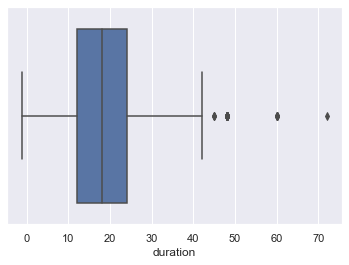

In [19]:
sns.boxplot(x='duration', data=credit_df)

Максимальное значение признака - 72 месяца, т.е. 6 лет, что приемлемо для кредита, следовательно, это не выброс.

<AxesSubplot:xlabel='installment_commitment'>

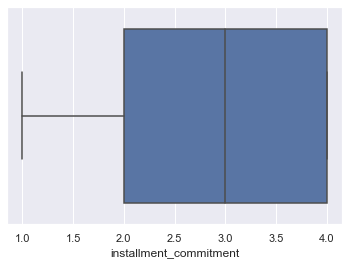

In [20]:
sns.boxplot(x='installment_commitment', data=credit_df)

Выбросов нет.

<AxesSubplot:xlabel='credit_amount'>

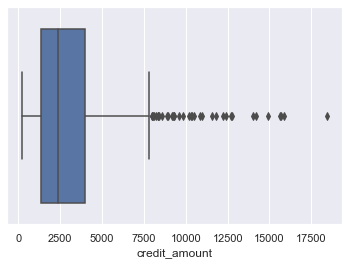

In [21]:
sns.boxplot(x='credit_amount', data=credit_df)

Максимальное значение признака - 18424 немецких марки, т.е. 791979.59 рублей по курсу на 18.02.20, что приемлемо для размера кредита, следовательно, это не выброс.

<AxesSubplot:xlabel='age'>

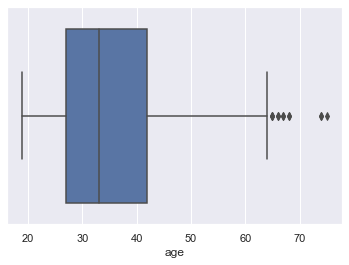

In [22]:
sns.boxplot(x='age', data=credit_df)

Максимальное значение признака - 75 лет, что приемлемо для кредитора, следовательно, это не выброс.

<AxesSubplot:xlabel='existing_credits'>

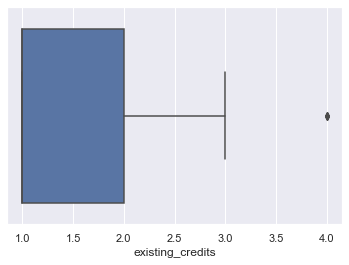

In [23]:
sns.boxplot(x='existing_credits', data=credit_df)

Выбросов нет, т.к. наличие четырех кредитов возможно.

<AxesSubplot:xlabel='num_dependents'>

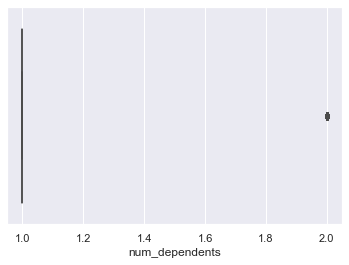

In [24]:
sns.boxplot(x='num_dependents', data=credit_df)

Выбросов нет.

# 6

In [29]:
credit_df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
other_parties             0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
foreign_worker            0
class                     0
dtype: int64

In [30]:
for i in credit_df.columns:
    print(credit_df[i].value_counts())

no checking    197
<0             146
0<=X<200       126
>=200           33
Name: checking_status, dtype: int64
 24.0    101
 12.0     71
 18.0     53
 36.0     37
 15.0     36
 6.0      30
-1.0      27
 9.0      24
 48.0     24
 30.0     23
 21.0     19
 10.0     10
 60.0      7
 42.0      5
 27.0      5
 4.0       4
 20.0      4
 39.0      3
 8.0       3
 45.0      3
 11.0      3
 13.0      2
 28.0      2
 72.0      1
 14.0      1
 22.0      1
 26.0      1
 40.0      1
 16.0      1
Name: duration, dtype: int64
existing paid                     263
critical/other existing credit    145
delayed previously                 42
all paid                           33
no credits/all paid                19
Name: credit_history, dtype: int64
radio/tv               142
new car                131
furniture/equipment     83
used car                52
business                46
education               25
repairs                 10
domestic appliance       6
other                    4
retraining    

In [32]:
credit_df['credit_amount'].min()

250.0

In [33]:
no_zero_columns = set(['credit_history', 'purpose', 'credit_amount', 'installment_commitment',  \
                             'other_parties', 'property_magnitude','age', 'other_payment_plans', \
                            'housing', 'existing_credits', 'job', 'num_dependents', 'foreign_worker', 'class', 'checking_status' ])

In [34]:
zero_columns = list(set(credit_df.columns) - no_zero_columns)

In [35]:
for i in zero_columns:
    print(credit_df[i].value_counts())

<100                303
no known savings     95
100<=X<500           55
500<=X<1000          30
>=1000               19
Name: savings_status, dtype: int64
 24.0    101
 12.0     71
 18.0     53
 36.0     37
 15.0     36
 6.0      30
-1.0      27
 9.0      24
 48.0     24
 30.0     23
 21.0     19
 10.0     10
 60.0      7
 42.0      5
 27.0      5
 4.0       4
 20.0      4
 39.0      3
 8.0       3
 45.0      3
 11.0      3
 13.0      2
 28.0      2
 72.0      1
 14.0      1
 22.0      1
 26.0      1
 40.0      1
 16.0      1
Name: duration, dtype: int64
1<=X<4        162
>=7           125
<1             92
4<=X<7         88
unemployed     27
0               8
Name: employment, dtype: int64


In [38]:

missed_values_cnt = credit_df[credit_df['savings_status'] == 'no known savings'].shape[0] + \
                credit_df[credit_df['employment'] == 0].shape[0] + \
                credit_df[credit_df['duration'] == -1].shape[0]
print(missed_values_cnt)

122


В датасеете 122 пропущенных значения в трех столбцах: savings_status, employment, duration.

### 7

Заменяем пропущенные значения на NaN

In [42]:
credit_df.loc[:, zero_columns] = credit_df[zero_columns].replace(set(['no known savings','0','-1']), np.NaN)

### 8

Порядковый признак

<AxesSubplot:>

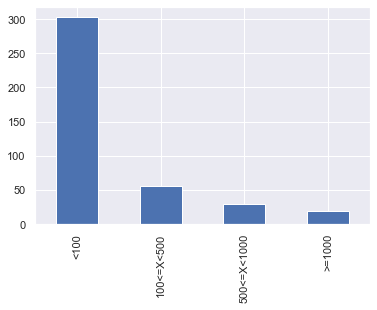

In [76]:
credit_df['savings_status'].value_counts().plot(kind='bar')

Номинальные признаки

<AxesSubplot:xlabel='class,purpose'>

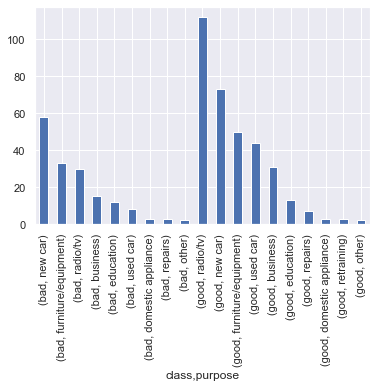

In [61]:
credit_df.groupby('class')['purpose'].value_counts().plot(kind='bar')

Абсолютный признак

<AxesSubplot:xlabel='duration', ylabel='Count'>

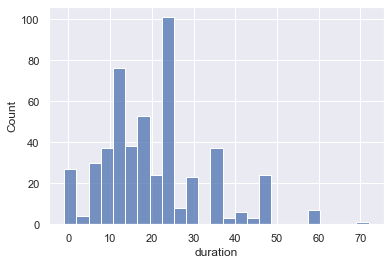

In [52]:
sns.histplot(credit_df['duration'])

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

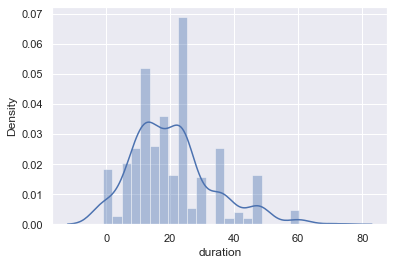

In [53]:
sns.distplot(credit_df['duration'])

Интервальный признак

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='installment_commitment', ylabel='Density'>

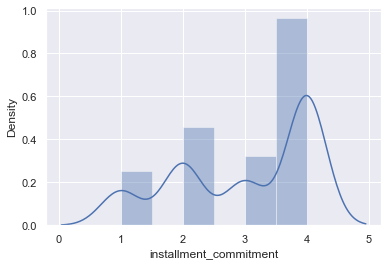

In [56]:
sns.distplot(credit_df['installment_commitment'])

### 9

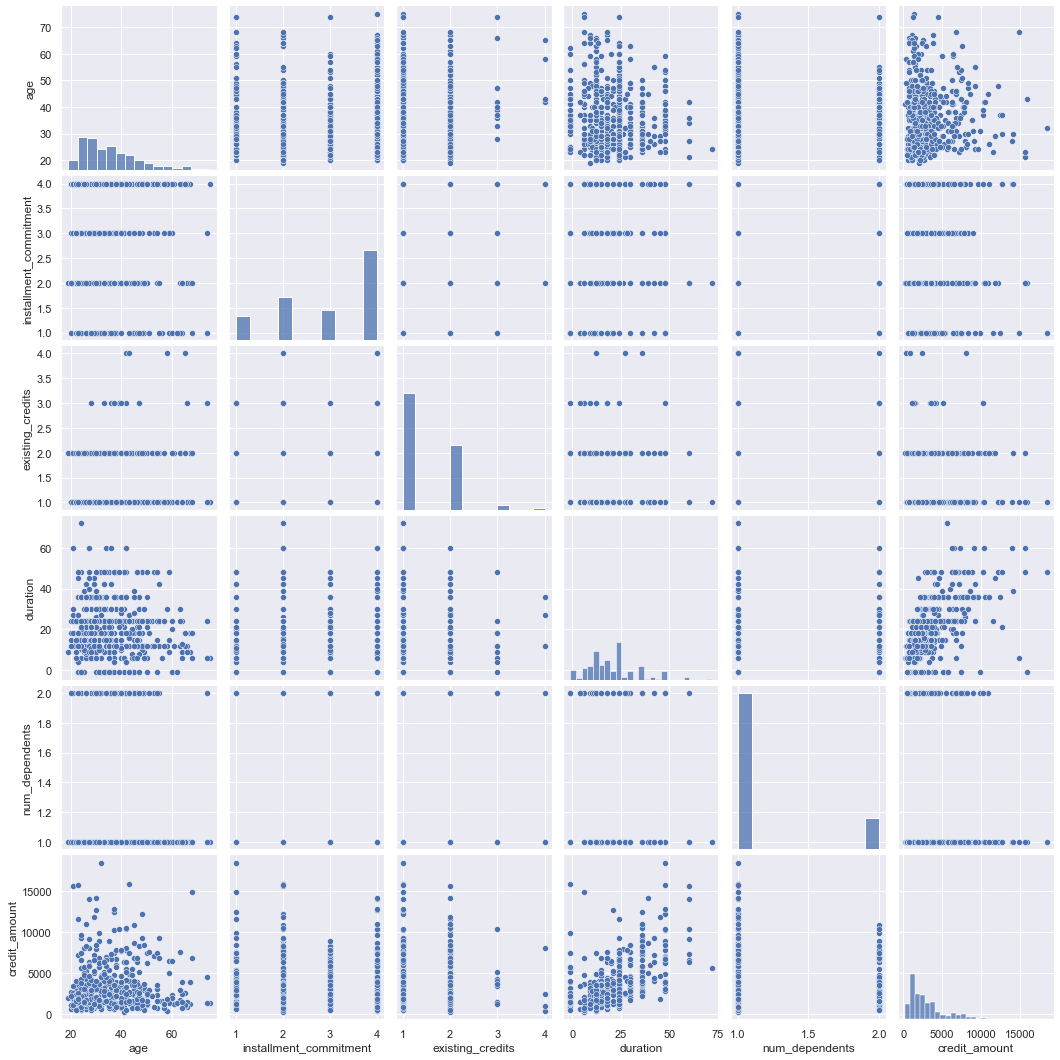

In [58]:
sns.pairplot(credit_df[countable_cols])

Из всех представленных графиков видим зависимость, близкую к линейной, между сроком кредита и его размером.

Text(0, 0.5, 'duration')

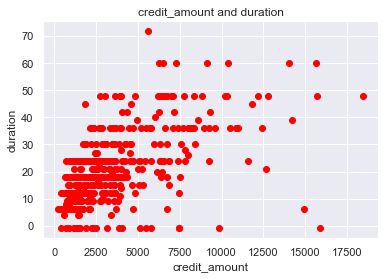

In [57]:
plt.scatter(credit_df['credit_amount'], credit_df['duration'], color='red')
plt.title('credit_amount and duration')
plt.xlabel('credit_amount')
plt.ylabel('duration')

In [59]:
corr_matrix = credit_df[countable_cols].corr()
corr_matrix

,age,installment_commitment,existing_credits,duration,num_dependents,credit_amount
age,1.000,-0.011,0.151,-0.066,0.122,0.044
installment_commitment,-0.011,1.000,-0.002,0.091,-0.096,-0.256
existing_credits,0.151,-0.002,1.000,-0.012,0.116,0.025
duration,-0.066,0.091,-0.012,1.000,-0.022,0.549
num_dependents,0.122,-0.096,0.116,-0.022,1.000,0.009
credit_amount,0.044,-0.256,0.025,0.549,0.009,1.000


<AxesSubplot:>

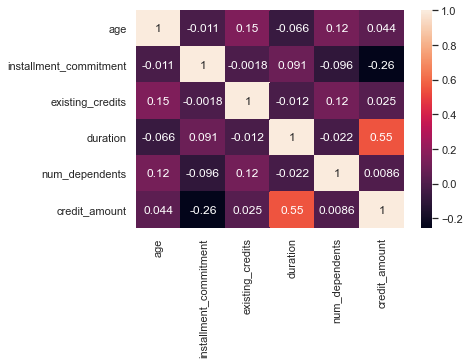

In [60]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

Между признаками credit_amount и duration самая большая корреляция (0.55). Между остальными признаками особой зависимости не наблюдается.

### 10

Стандартизировать можно все призаки порядковой шкалы, т.е. checking_status, savings_status, employment, job, для удобства дальнейшней обработки алгоритмами машинного обучения и визуально понятного сравнения.

### 11

Можно добавить признаки:
1. "Семейное положение", который часто используется подобными органами в качестве показателя надежности клиента (хотя, наличие супруга/cупруги не дает 100%-ой гарантии платежеспособности кредитора).
2. "Кредитный рейтинг" - показатель, который рассчитывается бюро кредитных историй на основе информации о взятых и просроченных кредитах, долгах, количестве запросов на проверку кредитной истории и её давности.

Данные показатели могут повлиять на размер одобренного кредита, класс заявителя и другие признаки.